In [1]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [10]:
def dvdt(t, v):
    """ODE: dv/dt = alpha*v^2 - Beta

    Args:
        v (float): Velocity
        t (float): Time
    """
    return 3*v**2 - 5

v0 = 0

In [11]:
t = np.linspace(0, 5, 100)
sol_method_1 = odeint(dvdt, y0=v0, t=t, tfirst=True)
sol_method_2 = solve_ivp(dvdt, t_span=(0, max(t)), y0=[v0], t_eval=t)

In [16]:
sol_method_1.T[0] # Velocity

array([ 0.        , -0.24935319, -0.4807706 , -0.68113062, -0.84443167,
       -0.97109907, -1.06562912, -1.13416194, -1.18281085, -1.21683057,
       -1.24037126, -1.25654244, -1.26759562, -1.27512471, -1.28024133,
       -1.28371297, -1.28606594, -1.28765954, -1.28873832, -1.28946834,
       -1.28996224, -1.29029634, -1.29052232, -1.29067516, -1.29077852,
       -1.29084843, -1.2908957 , -1.29092767, -1.29094929, -1.29096391,
       -1.2909738 , -1.29098049, -1.29098501, -1.29098806, -1.29099013,
       -1.29099153, -1.29099247, -1.29099311, -1.29099354, -1.29099384,
       -1.29099403, -1.29099417, -1.29099426, -1.29099432, -1.29099436,
       -1.29099439, -1.29099441, -1.29099442, -1.29099443, -1.29099444,
       -1.29099444, -1.29099444, -1.29099444, -1.29099445, -1.29099445,
       -1.29099445, -1.29099445, -1.29099445, -1.29099445, -1.29099445,
       -1.29099445, -1.29099445, -1.29099445, -1.29099445, -1.29099445,
       -1.29099445, -1.29099445, -1.29099445, -1.29099445, -1.29

In [20]:
sol_method_2.y[0]

array([ 0.        , -0.24935878, -0.48076886, -0.68112062, -0.84468932,
       -0.97144571, -1.06573928, -1.13453506, -1.18324028, -1.21698585,
       -1.24058697, -1.25677462, -1.26762074, -1.27515955, -1.28041617,
       -1.28381478, -1.2859623 , -1.2875825 , -1.28879681, -1.28955752,
       -1.28994557, -1.29015218, -1.29042369, -1.29069059, -1.29086619,
       -1.2909238 , -1.2908818 , -1.29080369, -1.29079807, -1.2909195 ,
       -1.29106907, -1.29117852, -1.29120771, -1.29114454, -1.29100502,
       -1.29083324, -1.29070137, -1.29070966, -1.29093885, -1.29126028,
       -1.29152332, -1.29163064, -1.29153821, -1.29125533, -1.29084463,
       -1.29042201, -1.29015673, -1.29026795, -1.2906939 , -1.29112472,
       -1.29138536, -1.29139028, -1.29114354, -1.29073872, -1.29035898,
       -1.29027703, -1.29061388, -1.29101481, -1.29129897, -1.29136861,
       -1.29120557, -1.2908713 , -1.2905069 , -1.29033305, -1.29057459,
       -1.29100402, -1.29137799, -1.29155204, -1.29146464, -1.29

In [22]:
v_sol_m1 = sol_method_1.T[0]
v_sol_m2 = sol_method_2.y[0]

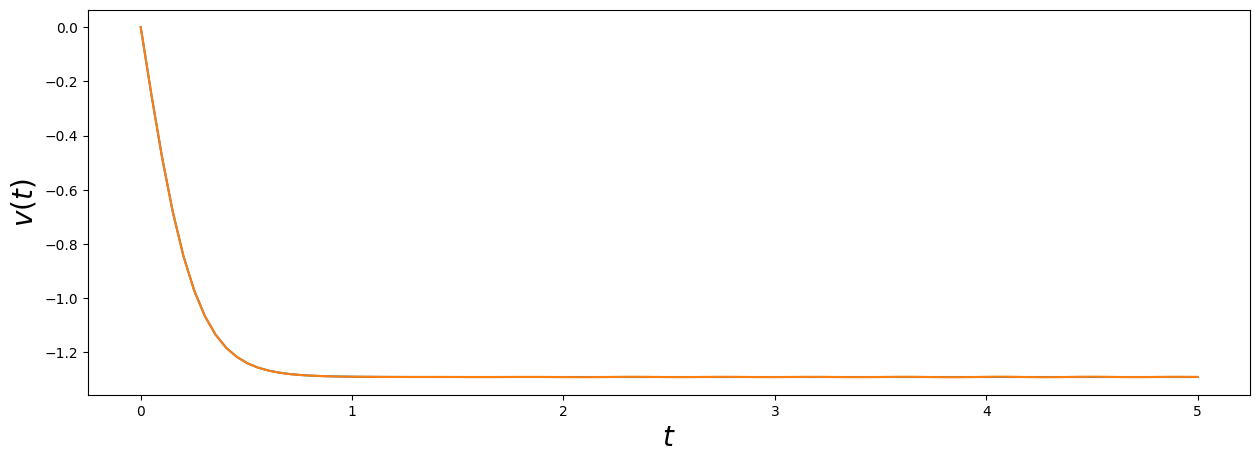

In [25]:
plt.figure(figsize=(15, 5))
plt.plot(t, v_sol_m1)
plt.plot(t, v_sol_m2)
plt.ylabel('$v(t)$', fontsize=20)
plt.xlabel('$t$', fontsize=20)
plt.show()

### Coupled First Order Differential Equations

In [26]:
def dSdx(x, S):
    """Return Vectorised dSdx

    Args:
        x (float): x variable
        S (tuple): Tuple containing y1, y2
    """
    y1, y2 = S
    return [
        y1 + y2**2 + 3*x,
        3*y1 + y2**3 - np.cos(x)
    ]

In [27]:
# Initial Conditions
y1_0, y2_0 = 0, 0
S_0 = (y1_0, y2_0)

In [28]:
# Solve for a bunch of values
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, y0=S_0, t=x, tfirst=True)

In [30]:
y1_sol, y2_sol = sol.T[0], sol.T[1]

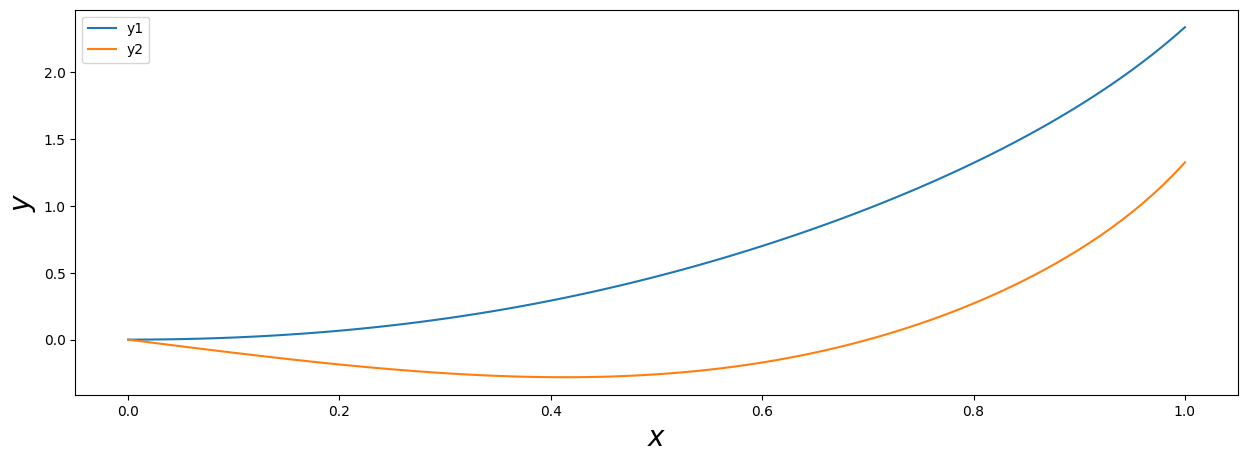

In [34]:
plt.figure(figsize=(15, 5))
plt.plot(x, y1_sol, label="y1")
plt.plot(x, y2_sol, label='y2')
plt.ylabel('$y$', fontsize=20)
plt.xlabel('$x$', fontsize=20)
plt.legend()
plt.show()

### Second Order Differential Equations

- Python does not have direct functions to solve second and higher order differential equations
- We can however convert any second order differential equation into two first order differential equation
- Then solve it

In [35]:
def dSdx(x, S):
    x, v = S
    return [
        v, 
        -v**2 + np.sin(x)
    ]

x_0 = 0
v_0 = 5
S_0 = (x_0, v_0)

In [36]:
t = np.linspace(0, 1, 100)
sol = odeint(dSdx, y0=S_0, t=t, tfirst=True)

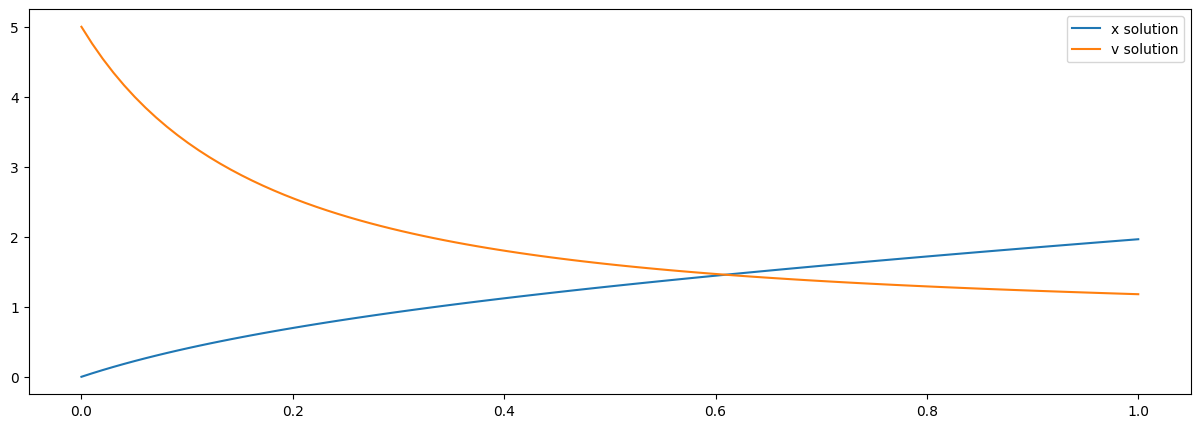

In [40]:
x_sol, v_sol = sol.T[0], sol.T[1]
plt.figure(figsize=(15, 5))
plt.plot(t, x_sol, label="x solution")
plt.plot(t, v_sol, label='v solution')
plt.legend()
plt.show()